<a href="https://colab.research.google.com/github/alan-hally/PlayGround/blob/feature%2Fmypullrequest/E_AI_Wind_Chill_Tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
print(tf.__version__)

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


2.17.0


In [9]:
n_samples=500
tt=np.random.uniform(-20,10,n_samples)
ff=np.random.uniform(0,50,n_samples)

wc=13.12+0.6215*tt-11.37*(ff ** 0.16) +0.3965 * tt * (ff **0.16)

x_train=torch.tensor(np.column_stack((tt,ff)),dtype=torch.float32)
y_train=torch.tensor(wc,dtype=torch.float32).view(-1,1) #adding a dummy dimension to expand tensor to two dimensions

In [19]:
#class wind_chill_model(nn.Module):
#  def __init__(self):
#      super(wind_chill_model,self).__init__()
#      self.fc1=nn.Linear(2,20) #First hidden layer, go from 2 dimensions to 20 neurons in first hidden layer
#      self.fc2=nn.Linear(20,20) #Second hidden layer, mapping from the 20 neurons to 20 more neurons
#      self.fc3=nn.Linear(20,1) #Output layer, mapping the neurons to 1 layer
#      self.relu=nn.ReLU() #This is the activation function

class wind_chill_model(nn.Module):
    def __init__(self):
        super(wind_chill_model, self).__init__()
        self.fc1 = nn.Linear(2, 20)  # First hidden layer
        self.fc2 = nn.Linear(20, 20)  # Second hidden layer
        self.fc3 = nn.Linear(20, 1)  # Output layer
        self.relu = nn.ReLU()  # Activation function

    def forward(self, x):
        x = self.relu(self.fc1(x))  # Apply ReLU after the first hidden layer
        x = self.relu(self.fc2(x))  # Apply ReLU after the second hidden layer
        x = self.fc3(x)  # Output layer (no activation for regression)
        return x

model=wind_chill_model()

#define the loss function and optimizer
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.0005)

In [20]:
train_loss =[]
n_epoch=10000

for epoch in range(n_epoch):
    model.train()  # Set model to train mode
    optimizer.zero_grad()  # Clear gradients
    y_pred = model(x_train)  # Forward pass
    loss = criterion(y_pred, y_train)  # Compute loss
    loss.backward()  # Backpropagate error
    optimizer.step()  # Update weights

    # Print loss every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{n_epoch}], Loss: {loss.item():.4f}')

    train_loss.append(loss.item())  # Save loss

Epoch [500/10000], Loss: 0.9703
Epoch [1000/10000], Loss: 0.5047
Epoch [1500/10000], Loss: 0.3667
Epoch [2000/10000], Loss: 0.2776
Epoch [2500/10000], Loss: 0.1738
Epoch [3000/10000], Loss: 0.0813
Epoch [3500/10000], Loss: 0.0486
Epoch [4000/10000], Loss: 0.0340
Epoch [4500/10000], Loss: 0.0250
Epoch [5000/10000], Loss: 0.0190
Epoch [5500/10000], Loss: 0.0165
Epoch [6000/10000], Loss: 0.0153
Epoch [6500/10000], Loss: 0.0147
Epoch [7000/10000], Loss: 0.0139
Epoch [7500/10000], Loss: 0.0129
Epoch [8000/10000], Loss: 0.0121
Epoch [8500/10000], Loss: 0.0114
Epoch [9000/10000], Loss: 0.0102
Epoch [9500/10000], Loss: 0.0091
Epoch [10000/10000], Loss: 0.0066


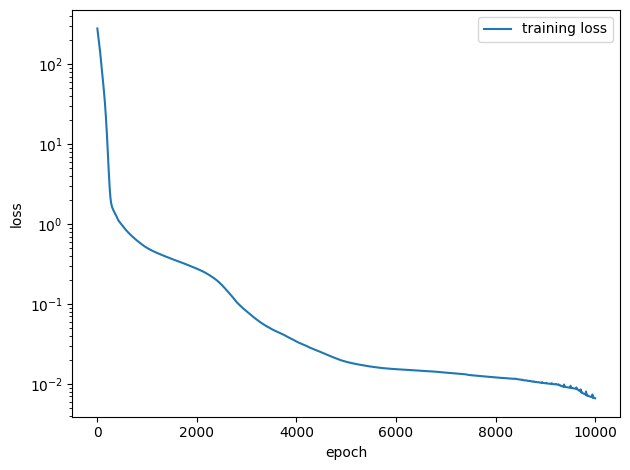

In [21]:
plt.plot(np.arange(n_epoch),train_loss,label="training loss")
plt.yscale('log')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.tight_layout()

In [22]:
# Create a validation data set
n_vsamples=100

vtt = np.random.uniform(-20, 10, n_vsamples)  # Temperature in Celsius
vff = np.random.uniform(0, 50, n_vsamples)  # Wind speed in km/h
vwc = 13.12 + 0.6215 * vtt - 11.37 * (vff ** 0.16) + 0.3965 * vtt * (vff ** 0.16)

x_val = torch.tensor(np.column_stack((vtt, vff)), dtype=torch.float32)
y_val = torch.tensor(vwc, dtype=torch.float32).view(-1, 1)

# Make the predictions with the model
y_pred=model(x_val)

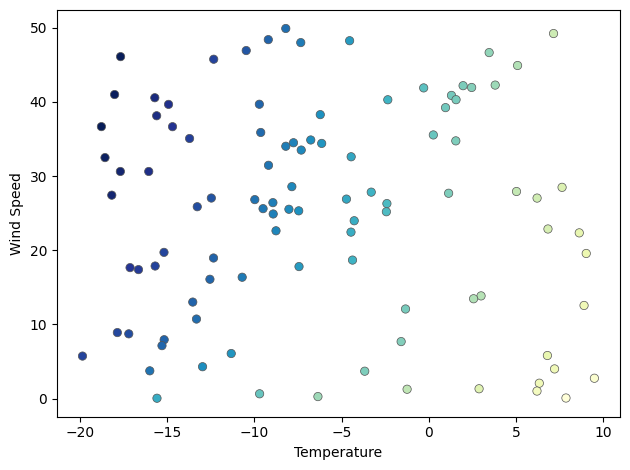

In [23]:
# Create a scatter plot for the wind chill estimates
plt.scatter(vtt,vff,c=y_pred.detach().numpy(),cmap="YlGnBu_r",edgecolor="#555555",linewidth=0.5)
plt.xlabel("Temperature")
plt.ylabel("Wind Speed")
plt.tight_layout()

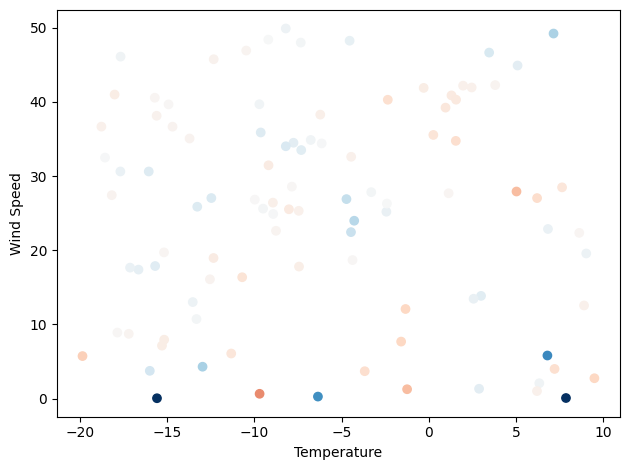

In [24]:
plt.scatter(vtt,vff,c=(y_pred-y_val).detach().numpy(),vmin=-0.5,vmax=0.5,cmap="RdBu_r")
plt.xlabel("Temperature")
plt.ylabel("Wind Speed")
plt.tight_layout()